In [15]:
import datacube
from datacube.storage.masking import mask_invalid_data
from datacube.api.query import Query
dc = datacube.Datacube()

In [16]:
# Takes a region code, returns the lat/lon
def getRegion(l) :
#nwt   1         # burn before and after 
#vi    2         # coastal area
#hvm   3         # copper mine
#fmm   4         # oil sands
#pet   5         # research forest
#glc   6         # athabasca glaciers
    if l == 1 :
        lat = (62.3768, 63.3062)
        lon = (-114.7038, -112.3989)
    elif l == 2 :
        lat = (47.9432, 49.4273)
        lon = (-123.7845, -121.2920)
    elif l == 3 :
        lat = (49.7178, 50.8349)
        lon = (-121.6712, -119.7794)
    elif l == 4 :
        lat = (56.7849, 57.8174)
        lon = (-112.1411, -110.0301)
    elif l == 6 :
        lat = (51.1364, 52.2393)
        lon = (-117.9841, -116.0518)
    else :
        lat = (45.4499, 46.6034)
        lon = (-78.4944, -76.7130)
    return (lat, lon)

In [17]:
# Takes query parameters, returns query object
def buildQuery(p, t1, t2, l) :    

    lat, lon = getRegion(l)
    
    query = { 
        'product' : p
        , 'latitude' : lat
        , 'longitude' : lon
        , 'resolution' : (-0.0025, 0.0025)
    }

    if (t1 != '') and (t2 != '') :
        query['time'] = (t1, t2)
    
    return query

In [18]:
# Takes data, and bands, returns a Normalized Difference Index on them.
def getBands(data) :
    bands =[];
    for d in data.data_vars:
        bands.append(data.data_vars[d].loc[ '1990' : '2018' ])
    
    return bands

In [19]:
# Select a product
product = 'LC08_scene'


# Select a prepared region
#nwt   1         # burn before and after 
#vi    2         # coastal area
#hvm   3         # copper mine
#fmm   4         # oil sands
#pet   5         # research forest
#glc   6         # athabasca glaciers

region = 6

# Select time start and end
start = ''
end = ''

In [20]:
query = buildQuery(product, start, end, region)
data = dc.load( **query)
bands = getBands(data)

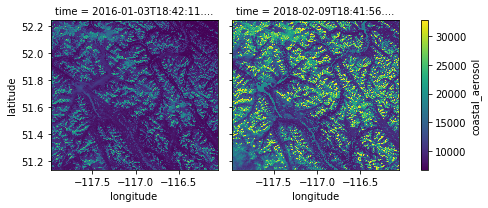

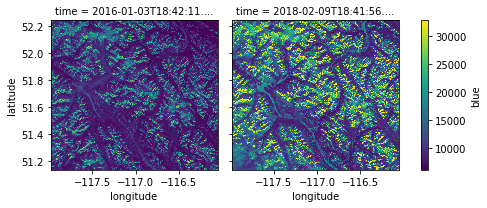

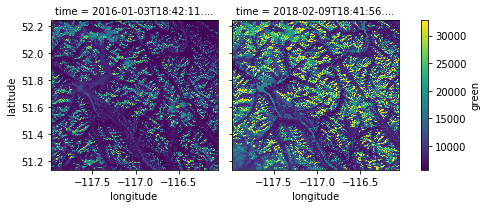

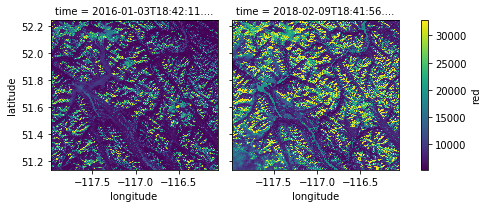

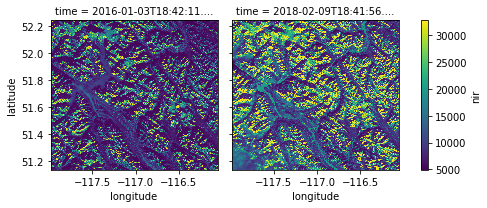

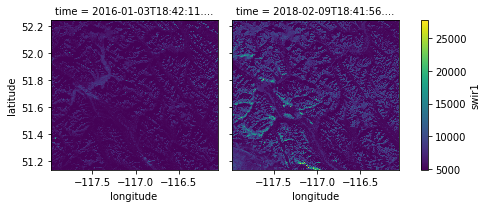

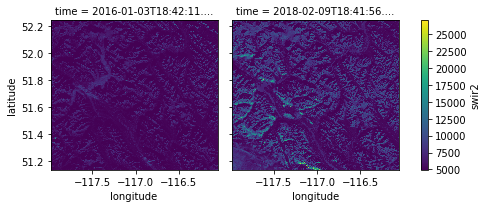

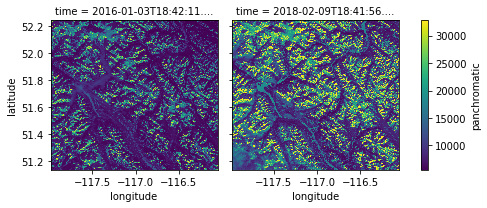

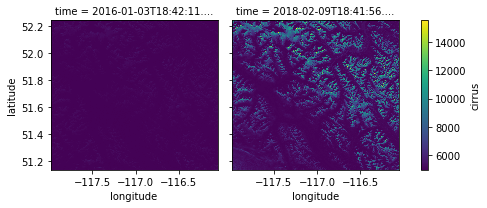

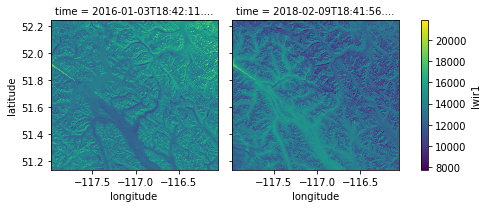

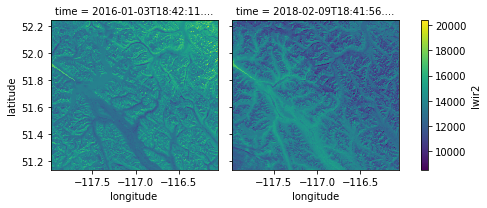

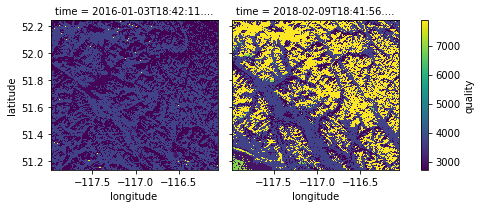

In [23]:
for curr in bands:
    curr.plot(col = 'time', size = 3)

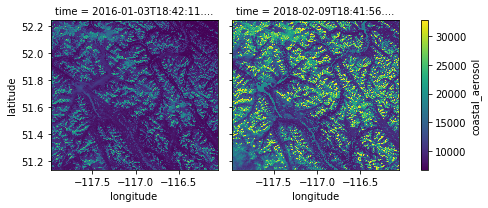

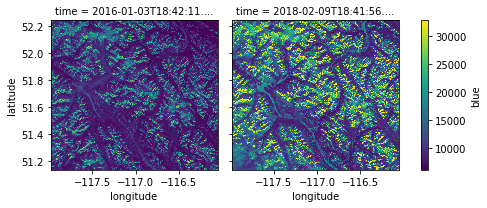

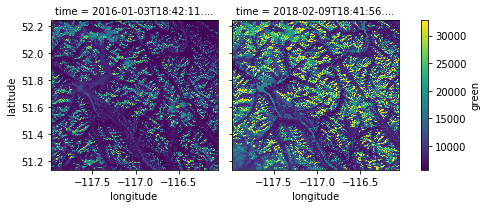

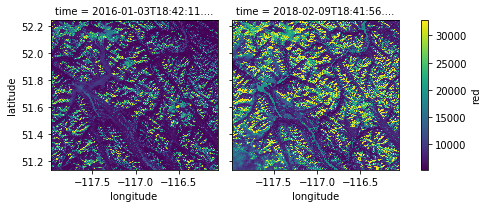

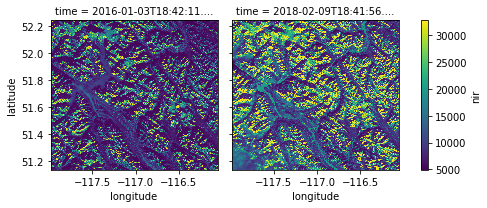

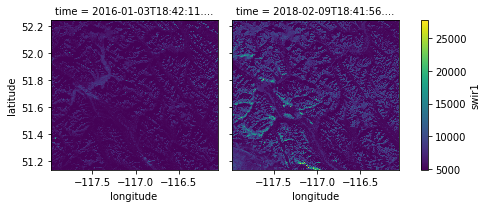

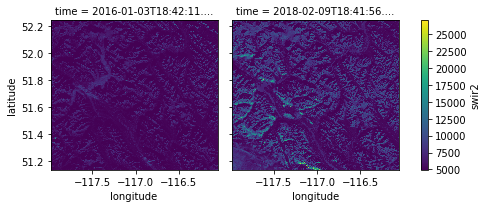

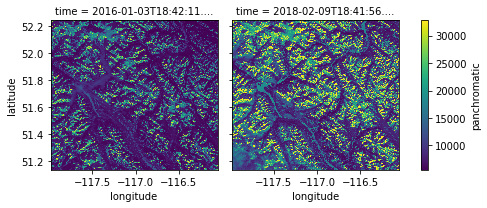

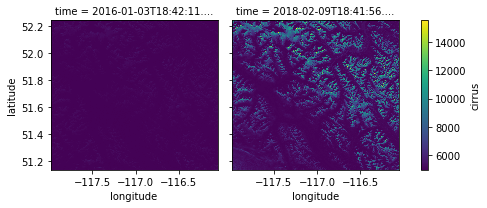

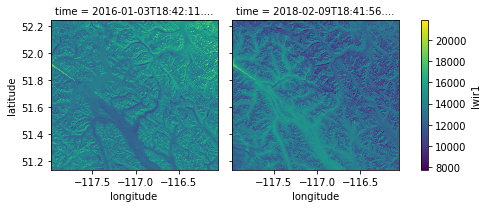

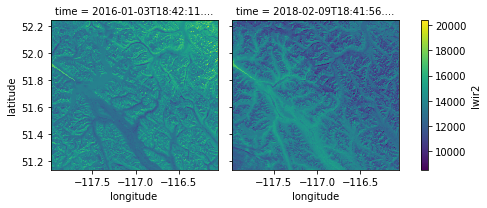

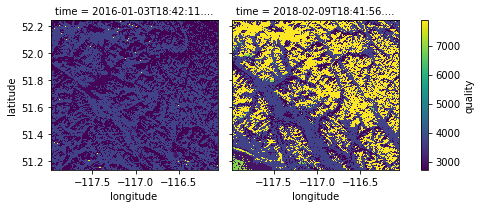

In [22]:
for curr in bands:
    curr.where(curr != curr.attrs['nodata']).plot(col = 'time', size = 3)